In [ ]:
!pip install bayesian-optimization
!pip install shap

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import cross_validate
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import shap
from sklearn.metrics import roc_auc_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Datasets/Diabetes Research Chinese/diabetes.csv')

In [ ]:
print(df.shape)

(4303, 18)


In [ ]:
def read_data(path):
    df = pd.read_csv(path, na_values='NA')
    # Printing the dataswet shape
    print ("features:")
    print (list(df.columns))
    print ("row and column number")
    print (df.shape)
    print ("data / feature types:")
    print (df.dtypes)
    df_num = df.select_dtypes(include='number')
    print('DF_NUM')
    print(df_num)
    df_cat = df.select_dtypes(include='object')
    print('DF_CAT')
    print(df_cat)
    print ("missing values:")
    print (df.isnull().sum())
    return [df, df_num, df_cat]

read_data('/content/drive/MyDrive/Thesis Datasets/Diabetes Research Chinese/diabetes.csv')

features:
['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy', 'Diabetes']
row and column number
(4303, 18)
data / feature types:
Age                 int64
Gender              int64
BMI               float64
SBP                 int64
DBP                 int64
FPG               float64
Chol              float64
Tri               float64
HDL               float64
LDL               float64
ALT               float64
BUN               float64
CCR               float64
FFPG              float64
smoking           float64
drinking          float64
family_histroy      int64
Diabetes            int64
dtype: object
DF_NUM
      Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0      26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1      40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2      40       2  19.7   85   53  5.30  5.87  1.29 

[      Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
 0      26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
 1      40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
 2      40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
 3      43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
 4      36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   
 ...   ...     ...   ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
 4298   54       1  23.4  126   75  6.82  5.00  1.50  1.24  2.98   8.0  3.50   
 4299   50       2  22.3  115   84  5.32  4.37  2.09  1.37  2.29  21.2  4.40   
 4300   67       1  24.6  138   81  4.85  3.89  1.38  1.14  2.17  18.1  4.73   
 4301   60       2  29.0  101   60  6.70  5.91  1.29  1.73  2.85  18.9  7.33   
 4302   37       1  34.3  120   71  4.97  5.42  2.66  1.08  2.87  81.0  4.61   
 
        CCR  FFPG   smoking  drinking 

In [ ]:
print(list(df.columns))

['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy', 'Diabetes']


In [ ]:
df.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000


In [ ]:
X = df.drop(['Diabetes'], axis=1)
y = df['Diabetes']

Diabetes
0    69.718801
1    30.281199
Name: count, dtype: float64


<Axes: ylabel='count'>

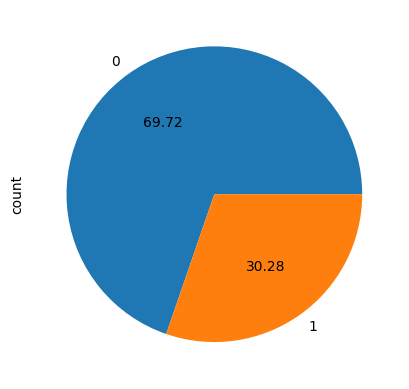

In [ ]:
print((y.value_counts() / len(y)) * 100)

y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2026551)

**Default XGBoost Model for Benchmark**

In [ ]:
# Create an instance of the XGBClassifier with default parameters
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = 2 * (precision * recall) / (precision + recall)
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Precision: 0.9422
Recall: 0.9172
F1-score: 0.9295
AUC: 0.9457
Accuracy: 0.9563
Confusion Matrix:
[[719  19]
 [ 28 310]]


**Benchmark case Hyperparameter Tuning**

In [ ]:
# Define the XGBoost classifier
xgb_clf_bench = xgb.XGBClassifier(objective='binary:logistic')

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 2000),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': [0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99],
    'min_child_weight': [1, 2, 3, 5, 7]
}

# Define scoring dictionary with desired metrics (AUC and Recall only)
scoring = {
    'AUC': 'roc_auc',
    'Recall': make_scorer(recall_score, average='binary'),
}

# Perform RandomizedSearchCV
regcv = RandomizedSearchCV(
    xgb_clf_bench,
    param_distributions=param_dist,
    n_iter=100,
    scoring=scoring,
    cv=5,
    error_score=0,
    verbose=3,
    refit='AUC'  # Specify the metric for refitting
)

# Fit RandomizedSearchCV on the training data
search = regcv.fit(X_train, y_train)

# Calculate combined score
combined_score = search.cv_results_['mean_test_AUC'] + search.cv_results_['mean_test_Recall']

# Get the index of the best parameters
best_index = np.argmax(combined_score)

# Print the best parameters
best_params = search.cv_results_['params'][best_index]
print("Best parameters based on combined score (AUC and Recall):")
print(best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.30621091319264093, max_depth=7, min_child_weight=7, n_estimators=1633, subsample=0.95; AUC: (test=0.978) Recall: (test=0.902) total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.30621091319264093, max_depth=7, min_child_weight=7, n_estimators=1633, subsample=0.95; AUC: (test=0.987) Recall: (test=0.902) total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.30621091319264093, max_depth=7, min_child_weight=7, n_estimators=1633, subsample=0.95; AUC: (test=0.982) Recall: (test=0.855) total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.30621091319264093, max_depth=7, min_child_weight=7, n_estimators=1633, subsample=0.95; AUC: (test=0.978) Recall: (test=0.907) total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.30621091319264093, max_depth=7, min_child_weigh

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix

# Manually insert the best hyperparameters
best_params = {'colsample_bytree': 0.95,
               'gamma': 0.1,
               'learning_rate': 0.20109513883734123,
               'max_depth': 6,
               'min_child_weight': 2,
               'n_estimators': 456,
               'subsample': 0.8}

# Create the XGBoost classifier with the best hyperparameters
best_xgb_clf = xgb.XGBClassifier(objective='binary:logistic', **best_params)

# Train the model on the entire training set
best_xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_clf.predict(X_test)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, best_xgb_clf.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics with Best Hyperparameters Insertion:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Evaluation Metrics with Best Hyperparameters Insertion:
Precision: 0.9429
Recall: 0.9290
F1-score: 0.9359
AUC: 0.9816
Accuracy: 0.9600
Confusion Matrix:
[[719  19]
 [ 24 314]]


**Benchmark case Hyperparameter Tuning using Bayeisan Optimization**

In [ ]:
# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

# Define parameter ranges for Bayesian Optimization
param_ranges = {
    'n_estimators': (100, 2000),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.5, 0.95),
    'max_depth': (1, 10),
    'gamma': (0, 0.9),
    'colsample_bytree': (0.5, 0.99),
    'min_child_weight': (1, 7)
}

# Define scoring function
def xgb_evaluate(n_estimators, learning_rate, subsample, max_depth, gamma, colsample_bytree, min_child_weight):
    xgb_clf.set_params(n_estimators=int(n_estimators),
                       learning_rate=learning_rate,
                       subsample=subsample,
                       max_depth=int(max_depth),
                       gamma=gamma,
                       colsample_bytree=colsample_bytree,
                       min_child_weight=min_child_weight)

    # Perform cross-validation and calculate mean AUC and Recall
    cv_result = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='roc_auc')
    cv_recall = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='recall')

    return cv_result.mean() + cv_recall.mean()  # Sum of AUC and Recall

# Perform Bayesian Optimization
xgb_bo = BayesianOptimization(xgb_evaluate, param_ranges)
xgb_bo.maximize(init_points=5, n_iter=100)

# Get the best parameters
best_params = xgb_bo.max['params']

# Print the best parameters
print("Best parameters:")
print(best_params)

In [ ]:
best_params_bo = {
    'colsample_bytree': 0.9088889452683976,
    'gamma': 0.8961295071371935,
    'learning_rate': 0.11863217092790353,
    'max_depth': 8,
    'min_child_weight': 3.603739288395729,
    'n_estimators': 318,
    'subsample': 0.7961275716860717
}

# Initialize the XGBoost classifier with the best parameters
xgb_clf_bo = xgb.XGBClassifier(objective='binary:logistic', **best_params_bo)

# Fit the model with the best parameters
xgb_clf_bo.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bo = xgb_clf_bo.predict(X_test)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred_bo)
recall = recall_score(y_test, y_pred_bo)
f1 = f1_score(y_test, y_pred_bo)
auc = roc_auc_score(y_test, xgb_clf_bo.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, y_pred_bo)
conf_matrix = confusion_matrix(y_test, y_pred_bo)

# Print the evaluation metrics
print("\nEvaluation Metrics for XGBoost model trained with Bayesian Optimization:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Evaluation Metrics for XGBoost model trained with Bayesian Optimization:
Precision: 0.9399
Recall: 0.9260
F1-score: 0.9329
AUC: 0.9845
Accuracy: 0.9582
Confusion Matrix:
[[718  20]
 [ 25 313]]


**Handling hidden missing values**

In [ ]:
df = df.mask(df == 4.860753, np.nan)

print(df.head())

   Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0   26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1   40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2   40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3   43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4   36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   

    CCR  FFPG  smoking  drinking  family_histroy  Diabetes  
0  63.8  5.40      3.0       3.0               0         0  
1  70.3  4.10      1.0       1.0               0         0  
2  61.1  4.85      3.0       3.0               0         0  
3  73.4  5.30      2.0       3.0               0         0  
4  67.5  5.53      3.0       3.0               0         0  


In [ ]:
print(df.isnull().sum())

Age                 0
Gender              0
BMI                 0
SBP                 0
DBP                 0
FPG                 0
Chol               14
Tri                14
HDL               411
LDL               394
ALT                 9
BUN                96
CCR                34
FFPG                0
smoking           888
drinking          888
family_histroy      0
Diabetes            0
dtype: int64


**Implementing KNN Imputation to take care of missing values**

In [ ]:
from sklearn.impute import KNNImputer

columns_to_impute = ['Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR']

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df[columns_to_impute]), columns=columns_to_impute)

df[columns_to_impute] = df_imputed

print(df.head())


   Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0   26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1   40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2   40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3   43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4   36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   

    CCR  FFPG  smoking  drinking  family_histroy  Diabetes  
0  63.8  5.40      3.0       3.0               0         0  
1  70.3  4.10      1.0       1.0               0         0  
2  61.1  4.85      3.0       3.0               0         0  
3  73.4  5.30      2.0       3.0               0         0  
4  67.5  5.53      3.0       3.0               0         0  


In [ ]:
df.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,3415.000000,3415.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860937,1.577811,1.327145,2.790914,26.798843,4.840767,72.104785,5.729084,2.523865,2.780673,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925612,1.246690,0.299929,0.672192,22.260561,1.254924,15.876888,1.424568,0.828216,0.468931,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,35.600000,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.120000,2.330000,14.300000,3.960000,60.400000,4.900000,2.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.300000,2.750000,20.600000,4.720000,72.100000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.930000,1.500000,3.190000,31.100000,5.580000,82.400000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,3.870000,6.270000,436.200000,17.730000,307.000000,29.700000,3.000000,3.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
SBP                 0
DBP                 0
FPG                 0
Chol                0
Tri                 0
HDL                 0
LDL                 0
ALT                 0
BUN                 0
CCR                 0
FFPG                0
smoking           888
drinking          888
family_histroy      0
Diabetes            0
dtype: int64

In [ ]:
print(df.columns)
categorical_cols = ['Gender', 'smoking', 'drinking']

Index(['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL',
       'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking',
       'family_histroy', 'Diabetes'],
      dtype='object')


**Performing One hot Encoding**

In [ ]:
# Replace missing values in 'smoking' and 'drinking' with a distinct category label
df['smoking'].fillna('missing', inplace=True)
df['drinking'].fillna('missing', inplace=True)

categorical_cols = ['Gender', 'smoking', 'drinking']

df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.drop(columns=['smoking_missing', 'drinking_missing'], inplace=True)

print(df_encoded.head())

   Age   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT  ...  \
0   26  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  ...   
1   40  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  ...   
2   40  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  ...   
3   43  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  ...   
4   36  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  ...   

   family_histroy  Diabetes  Gender_1  Gender_2  smoking_1.0  smoking_2.0  \
0               0         0      True     False        False        False   
1               0         0      True     False         True        False   
2               0         0     False      True        False        False   
3               0         0      True     False        False         True   
4               0         0      True     False        False        False   

   smoking_3.0  drinking_1.0  drinking_2.0  drinking_3.0  
0         True         False         False          True  
1        False  

In [ ]:
# Assuming 'Diabetes' is the target variable
X_enc = df_encoded.drop(columns=['Diabetes'])  # Drop the target variable to get the feature matrix
y_enc = df_encoded['Diabetes']  # Select the target variable column
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=2026551)


**Now running XGBoost again without Hyperparameter tuning to see results**

In [ ]:
# Create an instance of the XGBClassifier with default parameters
xgb_model_enc = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model_enc.fit(X_train_enc, y_train_enc)

# Make predictions on the testing data
y_pred_enc = xgb_model_enc.predict(X_test_enc)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred_enc)
recall = recall_score(y_test, y_pred_enc)
f1 = 2 * (precision * recall) / (precision + recall)
auc = roc_auc_score(y_test, y_pred_enc)
accuracy = accuracy_score(y_test, y_pred_enc)
conf_matrix = confusion_matrix(y_test, y_pred_enc)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Precision: 0.9119
Recall: 0.8876
F1-score: 0.8996
AUC: 0.9241
Accuracy: 0.9377
Confusion Matrix:
[[709  29]
 [ 38 300]]


**After Data Prep Hyperparameter Tuning**

In [ ]:
xgb_clf_pp = xgb.XGBClassifier(objective='binary:logistic')

param_dist = {
    'n_estimators': randint(100, 2000),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': [0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99],
    'min_child_weight': [1, 2, 3, 5, 7]
}

# Define scoring dictionary with desired metrics (AUC and Recall only)
scoring = {
    'AUC': 'roc_auc',
    'Recall': make_scorer(recall_score, average='binary'),
}
regcv = RandomizedSearchCV(
    xgb_clf_pp,
    param_distributions=param_dist,
    n_iter=100,
    scoring=scoring,
    cv=5,
    error_score=0,
    verbose=3,
    refit='AUC'  # Specify the metric for refitting
)
search = regcv.fit(X_train_enc, y_train)
combined_score = search.cv_results_['mean_test_AUC'] + search.cv_results_['mean_test_Recall']
best_index = np.argmax(combined_score)
best_params = search.cv_results_['params'][best_index]
print("Best parameters based on combined score (AUC and Recall):")
print(best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END colsample_bytree=0.85, gamma=0.9, learning_rate=0.2997147191616799, max_depth=1, min_child_weight=2, n_estimators=668, subsample=0.8; AUC: (test=0.970) Recall: (test=0.876) total time=   2.7s
[CV 2/5] END colsample_bytree=0.85, gamma=0.9, learning_rate=0.2997147191616799, max_depth=1, min_child_weight=2, n_estimators=668, subsample=0.8; AUC: (test=0.977) Recall: (test=0.876) total time=   0.5s
[CV 3/5] END colsample_bytree=0.85, gamma=0.9, learning_rate=0.2997147191616799, max_depth=1, min_child_weight=2, n_estimators=668, subsample=0.8; AUC: (test=0.979) Recall: (test=0.855) total time=   0.3s
[CV 4/5] END colsample_bytree=0.85, gamma=0.9, learning_rate=0.2997147191616799, max_depth=1, min_child_weight=2, n_estimators=668, subsample=0.8; AUC: (test=0.966) Recall: (test=0.881) total time=   0.3s
[CV 5/5] END colsample_bytree=0.85, gamma=0.9, learning_rate=0.2997147191616799, max_depth=1, min_child_weight=2, n_e

In [ ]:
# Manually insert the best hyperparameters
best_params = {'colsample_bytree': 0.99,
               'gamma': 0.3,
               'learning_rate': 0.18810849607741573,
               'max_depth': 9,
               'min_child_weight': 1,
               'n_estimators': 894,
               'subsample': 0.75}

# Create the XGBoost classifier with the best hyperparameters
best_xgb_clf = xgb.XGBClassifier(objective='binary:logistic', **best_params)

# Train the model on the entire training set
best_xgb_clf.fit(X_train_enc, y_train)

# Make predictions on the test set
y_pred = best_xgb_clf.predict(X_test_enc)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, best_xgb_clf.predict_proba(X_test_enc)[:, 1])
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics with Best Hyperparameters Insertion:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Evaluation Metrics with Best Hyperparameters Insertion:
Precision: 0.9177
Recall: 0.8905
F1-score: 0.9039
AUC: 0.9781
Accuracy: 0.9405
Confusion Matrix:
[[711  27]
 [ 37 301]]


**Now After Data Prep XGBoost + HP Bayesian**

In [ ]:
# Define the XGBoost classifier
xgb_clf_dp_bo = xgb.XGBClassifier(objective='binary:logistic')

# Define parameter ranges for Bayesian Optimization
param_ranges = {
    'n_estimators': (100, 2000),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.5, 0.95),
    'max_depth': (1, 10),
    'gamma': (0, 0.9),
    'colsample_bytree': (0.5, 0.99),
    'min_child_weight': (1, 7)
}

# Define scoring function
def xgb_evaluate(n_estimators, learning_rate, subsample, max_depth, gamma, colsample_bytree, min_child_weight):
    xgb_clf_dp_bo.set_params(n_estimators=int(n_estimators),
                       learning_rate=learning_rate,
                       subsample=subsample,
                       max_depth=int(max_depth),
                       gamma=gamma,
                       colsample_bytree=colsample_bytree,
                       min_child_weight=min_child_weight)

    # Perform cross-validation and calculate mean AUC and Recall
    cv_result = cross_val_score(xgb_clf_dp_bo, X_train_enc, y_train, cv=5, scoring='roc_auc')
    cv_recall = cross_val_score(xgb_clf_dp_bo, X_train_enc, y_train, cv=5, scoring='recall')

    return cv_result.mean() + cv_recall.mean()  # Sum of AUC and Recall

# Perform Bayesian Optimization
xgb_dp_bo = BayesianOptimization(xgb_evaluate, param_ranges)
xgb_dp_bo.maximize(init_points=5, n_iter=100)

# Get the best parameters
best_params = xgb_dp_bo.max['params']

# Print the best parameters
print("Best parameters:")
print(best_params)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 1.851     | 0.5238    | 0.2282    | 0.296     | 3.539     | 1.61      | 1.506e+03 | 0.6329    |
| 2         | 1.845     | 0.5913    | 0.2872    | 0.2809    | 5.695     | 3.921     | 1.993e+03 | 0.8431    |
| 3         | 1.854     | 0.8257    | 0.4755    | 0.2414    | 5.584     | 1.094     | 436.1     | 0.9271    |
| 4         | 1.842     | 0.8605    | 0.5989    | 0.2194    | 5.914     | 1.48      | 950.9     | 0.5827    |
| 5         | 1.848     | 0.5487    | 0.4049    | 0.2034    | 6.643     | 4.098     | 914.4     | 0.7937    |
| 6         | 1.856     | 0.7618    | 0.7721    | 0.02555   | 5.962     | 1.075     | 436.8     | 0.5364    |
| 7         | 1.842     | 0.6596    | 0.6235    | 0.1266    | 8.634     | 1.726     | 438.5     | 0.5533    |
| 8       

In [ ]:
best_params_bo2 = {'colsample_bytree': 0.9741411148917392,
                   'gamma': 0.6928,
                   'learning_rate': 0.21,
                   'max_depth': 8,
                   'min_child_weight': 2,
                   'n_estimators': 1285,
                   'subsample': 0.88472338}

# Initialize XGBoost classifier with the best parameters
xgb_clf_bo2 = xgb.XGBClassifier(objective='binary:logistic', **best_params_bo2)

# Fit the model
xgb_clf_bo2.fit(X_train_enc, y_train)

# Make predictions on the test set
y_pred_bo2 = xgb_clf_bo2.predict(X_test_enc)

# Compute evaluation metrics
precision_bo2 = precision_score(y_test, y_pred_bo2)
recall_bo2 = recall_score(y_test, y_pred_bo2)
f1_bo2 = f1_score(y_test, y_pred_bo2)
auc_bo2 = roc_auc_score(y_test, xgb_clf_bo2.predict_proba(X_test_enc)[:, 1])
accuracy_bo2 = accuracy_score(y_test, y_pred_bo2)
conf_matrix_bo2 = confusion_matrix(y_test, y_pred_bo2)

# Print the evaluation metrics
print("\nEvaluation Metrics for xgb_clf_bo2:")
print(f"Precision: {precision_bo2:.4f}")
print(f"Recall: {recall_bo2:.4f}")
print(f"F1-score: {f1_bo2:.4f}")
print(f"AUC: {auc_bo2:.4f}")
print(f"Accuracy: {accuracy_bo2:.4f}")
print("Confusion Matrix:")
print(conf_matrix_bo2)


Evaluation Metrics for xgb_clf_bo2:
Precision: 0.9207
Recall: 0.8935
F1-score: 0.9069
AUC: 0.9798
Accuracy: 0.9424
Confusion Matrix:
[[712  26]
 [ 36 302]]


<Figure size 1000x600 with 0 Axes>

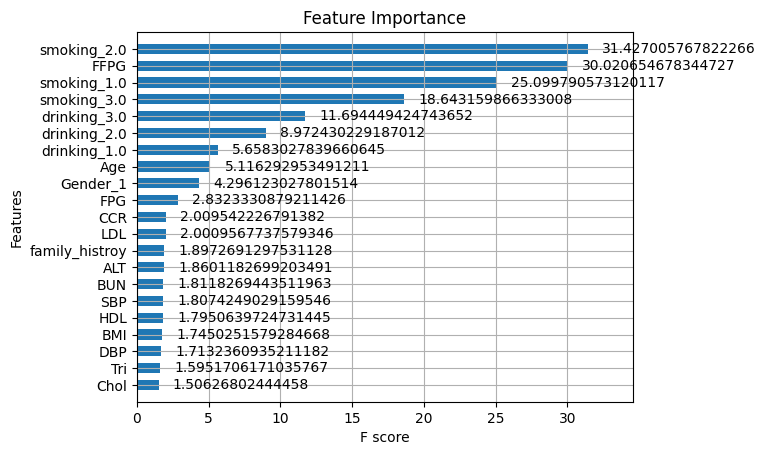

In [ ]:
# Get the total number of features
num_features = len(X_train_enc.columns)

# Plot feature importance for all features
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf_bo2, importance_type='gain', max_num_features=num_features, height=0.6)
plt.title('Feature Importance')
plt.show()



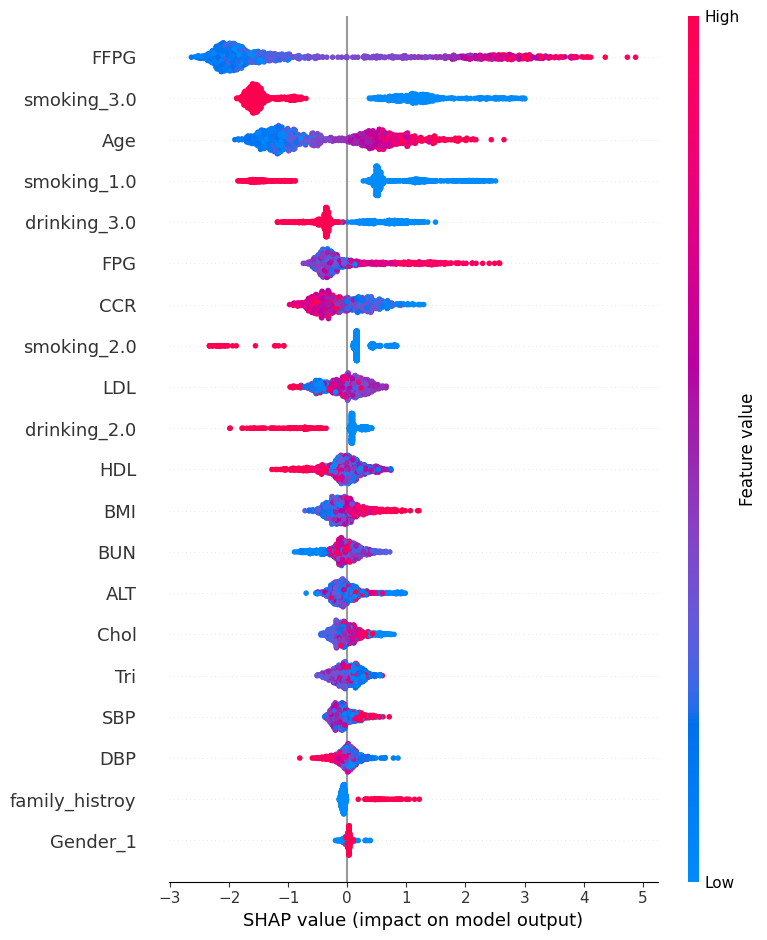

In [ ]:
# Extract SHAP values
explainer = shap.Explainer(xgb_clf_bo2)
shap_values = explainer.shap_values(X_test_enc)

# Create SHAP summary plot with four quadrants
shap.summary_plot(shap_values, X_test_enc, show=False)
plt.savefig('shap_summary_plot_four_quadrants.png', bbox_inches='tight')


**After Handling Imbalance of the Dataset**

Diabetes
0    69.718801
1    30.281199
Name: count, dtype: float64
Shape of upsampled X: (6000, 22)
Shape of upsampled y: (6000,)


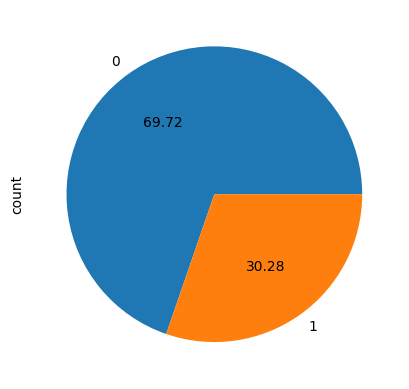

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
print((y_enc.value_counts() / len(y_enc)) * 100)

y_enc.value_counts().plot.pie(autopct='%.2f')
X_upsampled, y_upsampled = oversampler.fit_resample(X_enc, y_enc)


print("Shape of upsampled X:", X_upsampled.shape)
print("Shape of upsampled y:", y_upsampled.shape)

In [ ]:
import pandas as pd

# Assuming X_upsampled is a DataFrame and y_upsampled is a Series
# Combine X_upsampled and y_upsampled into one DataFrame
data_combined = pd.concat([X_upsampled, y_upsampled.rename('target')], axis=1)

# Export to CSV
data_combined.to_csv('diabetes_upsampled_data.csv', index=False)

print("Data has been successfully exported to 'diabetes_upsampled_data.csv'")


Data has been successfully exported to 'diabetes_upsampled_data.csv'


In [ ]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_upsampled, y_upsampled, test_size=0.25, random_state=2026551)

In [ ]:
# Define the XGBoost classifier
xgb_clf_dp_bal = xgb.XGBClassifier(objective='binary:logistic')

# Define parameter ranges for Bayesian Optimization
param_ranges = {
    'n_estimators': (100, 2000),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.5, 0.95),
    'max_depth': (1, 10),
    'gamma': (0, 0.9),
    'colsample_bytree': (0.5, 0.99),
    'min_child_weight': (1, 7)
}

# Define scoring function
def xgb_evaluate(n_estimators, learning_rate, subsample, max_depth, gamma, colsample_bytree, min_child_weight):
    xgb_clf_dp_bal.set_params(n_estimators=int(n_estimators),
                       learning_rate=learning_rate,
                       subsample=subsample,
                       max_depth=int(max_depth),
                       gamma=gamma,
                       colsample_bytree=colsample_bytree,
                       min_child_weight=min_child_weight)

    # Perform cross-validation and calculate mean AUC and Recall
    cv_result = cross_val_score(xgb_clf_dp_bal, X_train_bal, y_train_bal, cv=5, scoring='roc_auc')
    cv_recall = cross_val_score(xgb_clf_dp_bal, X_train_bal, y_train_bal, cv=5, scoring='recall')

    return cv_result.mean() + cv_recall.mean()  # Sum of AUC and Recall

# Perform Bayesian Optimization
xgb_dp_bal = BayesianOptimization(xgb_evaluate, param_ranges)
xgb_dp_bal.maximize(init_points=5, n_iter=100)

# Get the best parameters
best_params = xgb_dp_bal.max['params']

# Print the best parameters
print("Best parameters:")
print(best_params)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

**Best Model below**

In [ ]:
best_params_bal = {'colsample_bytree': 0.79,
                   'gamma': 0.41,
                   'learning_rate': 0.13,
                   'max_depth': 9,
                   'min_child_weight': 1,
                   'n_estimators': 1644,
                   'subsample': 0.90}

# Initialize XGBoost classifier with the best parameters
xgb_clf_bal = xgb.XGBClassifier(objective='binary:logistic', **best_params_bal)

# Fit the model
xgb_clf_bal.fit(X_train_bal, y_train_bal)

# Make predictions on the test set
y_pred_bal = xgb_clf_bal.predict(X_test_bal)

# Compute evaluation metrics
precision_bal = precision_score(y_test_bal, y_pred_bal)
recall_bal = recall_score(y_test_bal, y_pred_bal)
f1_bal = f1_score(y_test_bal, y_pred_bal)
auc_bal = roc_auc_score(y_test_bal, xgb_clf_bal.predict_proba(X_test_bal)[:, 1])
accuracy_bal = accuracy_score(y_test_bal, y_pred_bal)
conf_matrix_bal = confusion_matrix(y_test_bal, y_pred_bal)

# Print the evaluation metrics
print("\nEvaluation Metrics for xgb_clf_bal:")
print(f"Precision: {precision_bal:.4f}")
print(f"Recall: {recall_bal:.4f}")
print(f"F1-score: {f1_bal:.4f}")
print(f"AUC: {auc_bal:.4f}")
print(f"Accuracy: {accuracy_bal:.4f}")
print("Confusion Matrix:")
print(conf_matrix_bal)



Evaluation Metrics for xgb_clf_bal:
Precision: 0.9560
Recall: 0.9775
F1-score: 0.9666
AUC: 0.9946
Accuracy: 0.9660
Confusion Matrix:
[[710  34]
 [ 17 739]]


In [ ]:
xgb_clf_bal.save_model('xgb_model_bal.json')

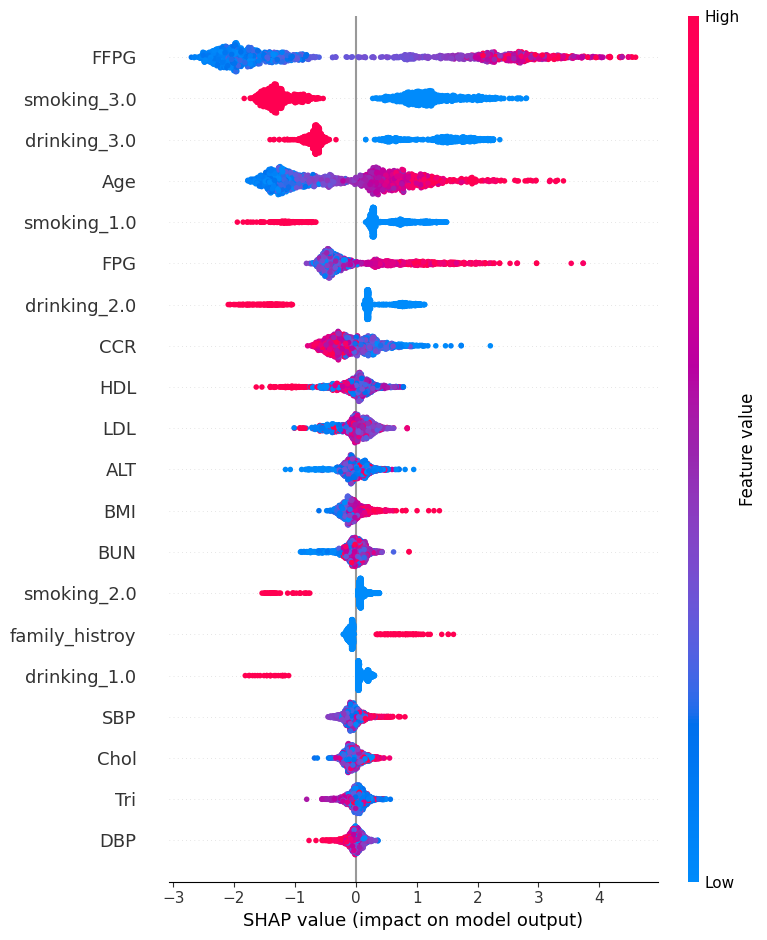

In [ ]:
# Extract SHAP values
explainer = shap.Explainer(xgb_clf_bal)
shap_values = explainer.shap_values(X_test_bal)


# Create SHAP summary plot with four quadrants
shap.summary_plot(shap_values, X_test_bal, show=False)
plt.savefig('shap_summary_plot_four_quadrants.png', bbox_inches='tight')


In [ ]:
feature_names = list(X_train_bal.columns)
# Calculate the absolute SHAP values
abs_shap_values = np.abs(shap_values)

# Calculate the mean SHAP values for each feature across all samples
mean_shap_values = np.mean(abs_shap_values, axis=0)

# Optionally, you can sort the features based on their mean SHAP values
sorted_features = np.argsort(mean_shap_values)[::-1]

# Print or visualize the mean SHAP values for each feature
for idx in sorted_features:
    print(f"Feature: {feature_names[idx]}, Mean SHAP Value: {mean_shap_values[idx]}")

Feature: FFPG, Mean SHAP Value: 1.991290807723999
Feature: smoking_3.0, Mean SHAP Value: 1.2467615604400635
Feature: drinking_3.0, Mean SHAP Value: 1.0176905393600464
Feature: Age, Mean SHAP Value: 0.9068247675895691
Feature: smoking_1.0, Mean SHAP Value: 0.609484076499939
Feature: FPG, Mean SHAP Value: 0.5825247168540955
Feature: drinking_2.0, Mean SHAP Value: 0.5506849884986877
Feature: CCR, Mean SHAP Value: 0.309161514043808
Feature: HDL, Mean SHAP Value: 0.22623224556446075
Feature: LDL, Mean SHAP Value: 0.2011519819498062
Feature: ALT, Mean SHAP Value: 0.15485943853855133
Feature: BMI, Mean SHAP Value: 0.14499859511852264
Feature: BUN, Mean SHAP Value: 0.13964159786701202
Feature: smoking_2.0, Mean SHAP Value: 0.13947460055351257
Feature: family_histroy, Mean SHAP Value: 0.12846066057682037
Feature: drinking_1.0, Mean SHAP Value: 0.1246873065829277
Feature: SBP, Mean SHAP Value: 0.11811545491218567
Feature: Chol, Mean SHAP Value: 0.11325855553150177
Feature: Tri, Mean SHAP Value: 

<Figure size 1000x600 with 0 Axes>

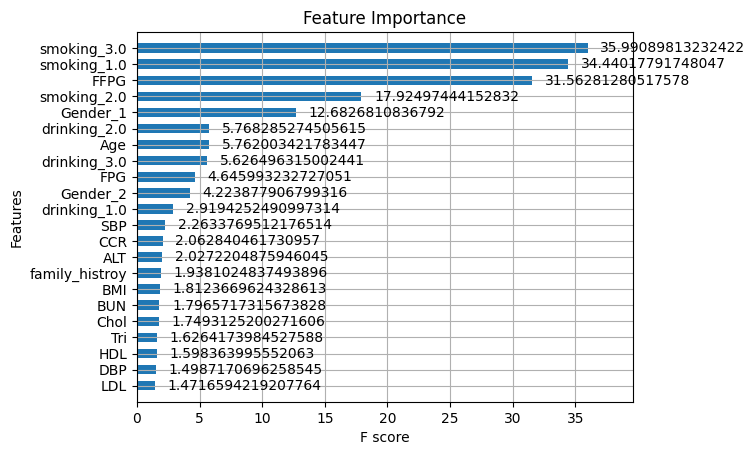

In [ ]:
# Get the total number of features
num_features = len(X_train_bal.columns)

# Plot feature importance for all features
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf_bal, importance_type='gain', max_num_features=num_features, height=0.6)
plt.title('Feature Importance')
plt.show()

In [ ]:
rf_clf = RandomForestClassifier()

# Define the parameter ranges for Bayesian Optimization
param_ranges = {
    'n_estimators': (50, 1000),
    'max_depth': (2, 8),
    'min_samples_split': (2, 8),
    'min_samples_leaf': (1, 8),
    'max_features': (0.5, 0.99),
}

def rf_evaluate(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_clf.set_params(n_estimators=int(n_estimators),
                      max_depth=int(max_depth),
                      min_samples_split=int(min_samples_split),
                      min_samples_leaf=int(min_samples_leaf),
                      max_features=max_features)

    # Perform cross-validation and calculate mean AUC and recall
    cv_results = cross_validate(rf_clf, X_train_bal, y_train_bal, cv=5,
                                scoring={'auc': 'roc_auc', 'recall': make_scorer(recall_score)})

    auc_mean = np.mean(cv_results['test_auc'])
    recall_mean = np.mean(cv_results['test_recall'])

    # Weighted average of AUC and recall
    weighted_score = (auc_mean + recall_mean) / 2

    return weighted_score

# Perform Bayesian Optimization
rf_bo = BayesianOptimization(rf_evaluate, param_ranges)
rf_bo.maximize(init_points=5, n_iter=40)

# Get the best parameters
best_params = rf_bo.max['params']

# Print the best parameters
print("Best parameters:")
print(best_params)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9517    | 4.386     | 0.8393    | 3.352     | 4.645     | 986.6     |
| 2         | 0.9611    | 7.474     | 0.6984    | 5.099     | 3.507     | 776.4     |
| 3         | 0.9606    | 7.297     | 0.6781    | 6.208     | 7.502     | 876.3     |
| 4         | 0.9493    | 4.489     | 0.6763    | 4.728     | 6.695     | 422.2     |
| 5         | 0.9388    | 3.316     | 0.8097    | 6.328     | 6.542     | 599.9     |
| 6         | 0.9505    | 4.541     | 0.9428    | 7.004     | 5.917     | 50.13     |
| 7         | 0.9511    | 4.508     | 0.7334    | 1.03      | 3.285     | 237.4     |
| 8         | 0.9123    | 2.026     | 0.7361    | 1.271     | 2.247     | 826.2     |
| 9         | 0.9595    | 6.786     | 0.6636    | 4.774     | 4.602     | 776.4     |
| 10        | 0.9582    | 6.059     | 0.6021    | 7.48

In [ ]:
best_params_rf = {
    'max_depth': 8,
    'max_features': 0.8647598531921877,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 767
}

# Initialize the RandomForestClassifier with the best parameters
rf_clf_manual = RandomForestClassifier(**best_params_rf)

# Fit the model with the training data
rf_clf_manual.fit(X_train_bal, y_train_bal)

# Make predictions on the test set
y_pred_manual = rf_clf_manual.predict(X_test_bal)

# Compute evaluation metrics
precision_manual = precision_score(y_test_bal, y_pred_manual)
recall_manual = recall_score(y_test_bal, y_pred_manual)
f1_manual = f1_score(y_test_bal, y_pred_manual)
auc_manual = roc_auc_score(y_test_bal, rf_clf_manual.predict_proba(X_test_bal)[:, 1])
accuracy_manual = accuracy_score(y_test_bal, y_pred_manual)
conf_matrix_manual = confusion_matrix(y_test_bal, y_pred_manual)

# Print the evaluation metrics
print("\nEvaluation Metrics for manually set RandomForest model:")
print(f"Precision: {precision_manual:.4f}")
print(f"Recall: {recall_manual:.4f}")
print(f"F1-score: {f1_manual:.4f}")
print(f"AUC: {auc_manual:.4f}")
print(f"Accuracy: {accuracy_manual:.4f}")
print("Confusion Matrix:")
print(conf_matrix_manual)


Evaluation Metrics for manually set RandomForest model:
Precision: 0.9491
Recall: 0.9365
F1-score: 0.9427
AUC: 0.9891
Accuracy: 0.9427
Confusion Matrix:
[[706  38]
 [ 48 708]]


**Stacking XGBoost and RF Model with LogisticRegression Metamodel**

In [ ]:
from sklearn.linear_model import LogisticRegression

stacked_predictions = np.column_stack((y_pred_bal, y_pred_manual))

# Train a meta-learner model (Logistic Regression) on the stacked predictions
meta_learner = LogisticRegression()
meta_learner.fit(stacked_predictions, y_test_bal)

# Make predictions using the meta-learner
meta_preds = meta_learner.predict(stacked_predictions)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_bal, meta_preds)
precision = precision_score(y_test_bal, meta_preds)
recall = recall_score(y_test_bal, meta_preds)
f1 = f1_score(y_test_bal, meta_preds)
auc = roc_auc_score(y_test_bal, meta_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)

Accuracy: 0.966
Precision: 0.9560155239327296
Recall: 0.9775132275132276
F1 Score: 0.9666448659254415
AUC: 0.9659071513910223


**Stacking XGBoost and RF Model with XGBoost Metamodel**

In [ ]:
import xgboost as xgb

# Convert y_test_bal to 1D array if it's not already
y_test_bal = np.asarray(y_test_bal).ravel()

# Create DMatrix with labels for stacked predictions
dstacked_predictions = xgb.DMatrix(stacked_predictions, label=y_test_bal)

# Define parameters for XGBoost meta-learner
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    # Add other hyperparameters as needed
}

# Train the XGBoost meta-learner
num_round = 100
meta_learner = xgb.train(params, dstacked_predictions, num_round)

# Make predictions using the meta-learner
meta_probs = meta_learner.predict(dstacked_predictions)

# Convert probabilities to binary predictions
meta_preds = np.where(meta_probs > 0.5, 1, 0)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_bal, meta_preds)
precision = precision_score(y_test_bal, meta_preds)
recall = recall_score(y_test_bal, meta_preds)
f1 = f1_score(y_test_bal, meta_preds)
auc = roc_auc_score(y_test_bal, meta_probs)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)


Accuracy: 0.966
Precision: 0.9560155239327296
Recall: 0.9775132275132276
F1 Score: 0.9666448659254415
AUC: 0.9693615946976163


**Prediction**

In [ ]:
y_test_bal = np.asarray(y_test_bal).ravel()

# Create DMatrix with labels for stacked predictions
dstacked_predictions = xgb.DMatrix(stacked_predictions, label=y_test_bal)

# Define parameters for XGBoost meta-learner using manually specified best hyperparameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 7,
    'min_child_weight': 2,
    'n_estimators': 396,
    'subsample': 0.5290418060840998,
    'colsample_bytree': 0.6872700594236812,
    'gamma': 0.9507143064099162,
    'learning_rate': 0.22227824312530747
    # Add other hyperparameters as needed
}

# Train the XGBoost meta-learner
num_round = 100
meta_learner = xgb.train(params, dstacked_predictions, num_round)

# Make predictions using the meta-learner
meta_probs = meta_learner.predict(dstacked_predictions)

# Convert probabilities to binary predictions
meta_preds = np.where(meta_probs > 0.5, 1, 0)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_bal, meta_preds)
precision = precision_score(y_test_bal, meta_preds)
recall = recall_score(y_test_bal, meta_preds)
f1 = f1_score(y_test_bal, meta_preds)
auc = roc_auc_score(y_test_bal, meta_probs)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)

Accuracy: 0.966
Precision: 0.9560155239327296
Recall: 0.9775132275132276
F1 Score: 0.9666448659254415
AUC: 0.9693615946976163


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:50:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


**Hyperparameter tuning on the stacked model with XGBoost**

In [ ]:
from bayes_opt import BayesianOptimization

# Define the hyperparameter search space
param_space = {
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1),
    'gamma': (0, 1),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 2000)  # Added n_estimators range
    # Add other hyperparameters as needed
}

# Define the objective function for Bayesian Optimization
def objective_function(max_depth, min_child_weight, subsample, colsample_bytree, gamma, learning_rate, n_estimators):
    # Define parameters for XGBoost meta-learner
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth': int(max_depth),
        'min_child_weight': int(min_child_weight),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': gamma,
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators)  # Added n_estimators parameter
        # Add other hyperparameters as needed
    }

    # Train the XGBoost meta-learner
    meta_learner = xgb.train(params, dstacked_predictions, num_round)

    # Make predictions using the meta-learner
    meta_probs = meta_learner.predict(dstacked_predictions)

    # Calculate AUC
    auc = roc_auc_score(y_test_bal, meta_probs)

    # Calculate Recall
    meta_preds = np.where(meta_probs > 0.5, 1, 0)
    recall = recall_score(y_test_bal, meta_preds)

    # Combine Recall and AUC (you can adjust the weights as needed)
    score = recall + auc

    return score

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=param_space,
    random_state=42
)

# Perform Bayesian Optimization
optimizer.maximize(init_points=5, n_iter=100)

# Get the best hyperparameters
best_hyperparameters = optimizer.max['params']
print("Best Hyperparameters:", best_hyperparameters)


|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 1.947     | 0.6873    | 0.9507    | 0.2223    | 7.191     | 2.404     | 396.4     | 0.529     |
| 2         | 1.947     | 0.9331    | 0.6011    | 0.2153    | 3.144     | 9.729     | 1.682e+03 | 0.6062    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 3         | 1.947     | 0.5909    | 0.1834    | 0.09823   | 6.673     | 4.888     | 653.3     | 0.8059    |
| 4         | 1.947     | 0.5697    | 0.2921    | 0.1162    | 6.192     | 8.067     | 479.4     | 0.7571    |
| 5         | 1.947     | 0.7962    | 0.04645   | 0.1862    | 4.194     | 1.585     | 1.903e+03 | 0.9828    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 6         | 1.947     | 0.9458    | 0.08703   | 0.2416    | 9.166     | 1.401     | 1.998e+03 | 0.6503    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 7         | 1.947     | 0.8523    | 0.5214    | 0.2919    | 9.286     | 9.522     | 101.9     | 0.6671    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 8         | 1.947     | 0.7128    | 0.3408    | 0.2724    | 6.308     | 9.484     | 664.8     | 0.8402    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 9         | 1.947     | 0.9571    | 0.734     | 0.1117    | 9.745     | 9.289     | 1.999e+03 | 0.7503    |
| 10        | 1.947     | 0.778     | 0.9037    | 0.2019    | 4.614     | 9.695     | 852.7     | 0.5138    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 11        | 1.947     | 0.9934    | 0.4994    | 0.203     | 7.526     | 1.612     | 101.1     | 0.8873    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 12        | 1.947     | 0.604     | 0.6984    | 0.1397    | 9.317     | 1.468     | 1.997e+03 | 0.6232    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 13        | 1.947     | 0.8863    | 0.9062    | 0.2021    | 8.347     | 1.24      | 100.0     | 0.9359    |
| 14        | 1.947     | 0.9881    | 0.6999    | 0.2718    | 6.113     | 4.672     | 556.8     | 0.5895    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 15        | 1.947     | 0.7141    | 0.3273    | 0.1601    | 9.87      | 1.152     | 1.792e+03 | 0.7597    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 16        | 1.947     | 0.5032    | 0.4829    | 0.09435   | 7.104     | 5.598     | 403.4     | 0.9832    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 17        | 1.947     | 0.7612    | 0.582     | 0.1679    | 5.002     | 9.393     | 1.998e+03 | 0.6205    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 18        | 1.947     | 0.6686    | 0.9659    | 0.03743   | 6.301     | 9.756     | 1.207e+03 | 0.8913    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 19        | 1.947     | 0.7471    | 0.8073    | 0.1696    | 9.669     | 5.242     | 1.887e+03 | 0.6573    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 20        | 1.905     | 0.9056    | 0.4356    | 0.02286   | 3.132     | 2.45      | 102.6     | 0.6901    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 21        | 1.947     | 0.9457    | 0.2263    | 0.09049   | 7.552     | 5.592     | 1.997e+03 | 0.6847    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 22        | 1.947     | 0.6815    | 0.6806    | 0.1166    | 5.033     | 1.442     | 401.3     | 0.6747    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 23        | 1.947     | 0.8821    | 0.02108   | 0.1221    | 9.209     | 7.239     | 398.7     | 0.9095    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 24        | 1.947     | 0.8784    | 0.7622    | 0.2378    | 3.703     | 6.458     | 400.0     | 0.5651    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 25        | 1.947     | 0.6868    | 0.2383    | 0.07783   | 3.962     | 6.67      | 394.2     | 0.5721    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 26        | 1.947     | 0.7054    | 0.7595    | 0.1869    | 9.214     | 6.219     | 391.5     | 0.945     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 27        | 1.947     | 0.6424    | 0.1566    | 0.1823    | 9.987     | 2.6       | 400.3     | 0.8672    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 28        | 1.947     | 0.7397    | 0.3205    | 0.2326    | 8.116     | 9.799     | 1.994e+03 | 0.7674    |
| 29        | 1.947     | 0.5986    | 0.9203    | 0.2192    | 5.377     | 2.024     | 389.9     | 0.9604    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 30        | 1.947     | 0.5373    | 0.8296    | 0.1322    | 3.08      | 6.224     | 388.7     | 0.5174    |
| 31        | 1.947     | 0.8694    | 0.1683    | 0.1862    | 8.379     | 6.822     | 386.2     | 0.7633    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 32        | 1.947     | 0.7195    | 0.6831    | 0.1949    | 7.97      | 1.238     | 385.5     | 0.9001    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 33        | 1.947     | 0.9173    | 0.6994    | 0.03065   | 3.439     | 2.273     | 384.2     | 0.9757    |
| 34        | 1.947     | 0.5552    | 0.3328    | 0.1206    | 6.986     | 6.229     | 381.3     | 0.8403    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 35        | 1.947     | 0.5465    | 0.8886    | 0.2275    | 3.698     | 6.223     | 1.993e+03 | 0.8222    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 36        | 1.947     | 0.6748    | 0.4024    | 0.2603    | 8.258     | 4.19      | 1.991e+03 | 0.5508    |
| 37        | 1.947     | 0.902     | 0.7156    | 0.2097    | 3.664     | 1.274     | 1.995e+03 | 0.8368    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 38        | 1.947     | 0.8734    | 0.4266    | 0.2081    | 6.171     | 8.181     | 1.988e+03 | 0.6296    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 39        | 1.947     | 0.7506    | 0.6709    | 0.2639    | 4.38      | 1.662     | 1.988e+03 | 0.7832    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 40        | 1.947     | 0.5013    | 0.2182    | 0.2704    | 3.496     | 5.276     | 1.984e+03 | 0.5323    |
| 41        | 1.947     | 0.9187    | 0.5808    | 0.292     | 9.604     | 4.059     | 1.985e+03 | 0.5225    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 42        | 1.947     | 0.7639    | 0.04315   | 0.194     | 3.575     | 9.79      | 383.1     | 0.7082    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 43        | 1.947     | 0.6792    | 0.9163    | 0.05597   | 6.715     | 2.694     | 1.98e+03  | 0.8695    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 44        | 1.947     | 0.7782    | 0.2427    | 0.113     | 7.706     | 8.223     | 1.982e+03 | 0.5664    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 45        | 1.947     | 0.5101    | 0.8432    | 0.1863    | 7.239     | 7.663     | 658.4     | 0.8015    |
| 46        | 1.947     | 0.7296    | 0.2529    | 0.1667    | 3.714     | 3.116     | 2e+03     | 0.717     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 47        | 1.947     | 0.5203    | 0.8074    | 0.06434   | 9.943     | 1.081     | 392.4     | 0.68      |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 48        | 1.947     | 0.7717    | 0.5873    | 0.1408    | 3.478     | 6.598     | 1.978e+03 | 0.5243    |
| 49        | 1.947     | 0.7632    | 0.3144    | 0.234     | 7.951     | 5.188     | 1.975e+03 | 0.8584    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 50        | 1.947     | 0.6893    | 0.67      | 0.05291   | 7.646     | 4.225     | 662.6     | 0.8898    |
| 51        | 1.947     | 0.7005    | 0.782     | 0.2382    | 8.532     | 2.314     | 657.7     | 0.8007    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 52        | 1.947     | 0.9126    | 0.7268    | 0.236     | 3.551     | 3.052     | 658.9     | 0.6442    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 53        | 1.947     | 0.8377    | 0.03132   | 0.1154    | 4.09      | 2.147     | 1.974e+03 | 0.9992    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 54        | 1.947     | 0.7085    | 0.4472    | 0.1784    | 3.022     | 5.222     | 665.1     | 0.6998    |
| 55        | 1.947     | 0.9931    | 0.8299    | 0.2241    | 6.515     | 4.472     | 669.1     | 0.9747    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 56        | 1.947     | 0.9728    | 0.7744    | 0.2449    | 3.175     | 8.827     | 655.0     | 0.6136    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 57        | 1.947     | 0.609     | 0.04277   | 0.09946   | 5.9       | 9.885     | 389.8     | 0.5989    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 58        | 1.947     | 0.9119    | 0.7375    | 0.2384    | 3.359     | 8.951     | 669.5     | 0.6723    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 59        | 1.947     | 0.6462    | 0.5948    | 0.2375    | 9.464     | 8.446     | 671.5     | 0.656     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 60        | 1.947     | 0.8216    | 0.9717    | 0.04336   | 3.193     | 6.88      | 1.972e+03 | 0.9812    |
| 61        | 1.947     | 0.7125    | 0.5216    | 0.07483   | 9.069     | 1.309     | 406.3     | 0.5992    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 62        | 1.947     | 0.6855    | 0.6955    | 0.137     | 6.853     | 2.129     | 1.97e+03  | 0.7142    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 63        | 1.947     | 0.96      | 0.8476    | 0.2206    | 9.434     | 9.836     | 653.2     | 0.5496    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 64        | 1.947     | 0.6951    | 0.7438    | 0.1521    | 4.406     | 6.207     | 674.6     | 0.691     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 65        | 1.947     | 0.72      | 0.003232  | 0.05553   | 8.889     | 6.96      | 1.968e+03 | 0.9828    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 66        | 1.947     | 0.5528    | 0.7954    | 0.2662    | 5.001     | 4.8       | 1.965e+03 | 0.6703    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 67        | 1.947     | 0.6482    | 0.4155    | 0.178     | 5.072     | 9.541     | 649.9     | 0.5837    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 68        | 1.947     | 0.8334    | 0.5295    | 0.2889    | 3.581     | 9.753     | 1.966e+03 | 0.9381    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 69        | 1.947     | 0.7214    | 0.2653    | 0.2006    | 9.89      | 7.005     | 648.6     | 0.9935    |
| 70        | 1.947     | 0.9205    | 0.6233    | 0.1541    | 7.802     | 9.788     | 1.977e+03 | 0.6623    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 71        | 1.947     | 0.5085    | 0.5514    | 0.2388    | 8.753     | 9.354     | 1.964e+03 | 0.7063    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 72        | 1.947     | 0.9327    | 0.02946   | 0.1084    | 3.192     | 8.469     | 661.2     | 0.6378    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 73        | 1.947     | 0.5395    | 0.4481    | 0.2001    | 4.673     | 3.81      | 648.2     | 0.5933    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 74        | 1.947     | 0.6854    | 0.8675    | 0.1364    | 9.686     | 2.416     | 1.965e+03 | 0.5913    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 75        | 1.947     | 0.6607    | 0.4388    | 0.2548    | 5.966     | 7.792     | 644.3     | 0.694     |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 76        | 1.947     | 0.9571    | 0.6125    | 0.08047   | 4.017     | 3.398     | 407.2     | 0.5752    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 77        | 1.947     | 0.7003    | 0.12      | 0.2314    | 7.86      | 6.559     | 409.2     | 0.5297    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 78        | 1.947     | 0.7523    | 0.4803    | 0.2022    | 9.0       | 1.01      | 650.1     | 0.7371    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 79        | 1.947     | 0.9224    | 0.9302    | 0.2872    | 4.219     | 9.225     | 405.8     | 0.7355    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 80        | 1.947     | 0.8432    | 0.3937    | 0.2039    | 6.891     | 1.756     | 411.9     | 0.8699    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 81        | 1.947     | 0.8364    | 0.1681    | 0.08575   | 8.735     | 1.862     | 644.4     | 0.7006    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 82        | 1.947     | 0.7888    | 0.8857    | 0.1317    | 3.149     | 3.001     | 642.3     | 0.8894    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 83        | 1.947     | 0.9611    | 0.9424    | 0.1465    | 3.397     | 6.544     | 413.0     | 0.9707    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 84        | 1.947     | 0.7741    | 0.7646    | 0.1378    | 8.467     | 7.25      | 414.8     | 0.9346    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 85        | 1.905     | 0.5126    | 1.0       | 0.01      | 3.0       | 1.0       | 652.6     | 1.0       |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 86        | 1.947     | 0.9259    | 0.8922    | 0.2377    | 8.178     | 9.681     | 394.9     | 0.8866    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 87        | 1.905     | 0.6538    | 0.6364    | 0.01787   | 6.116     | 2.727     | 417.8     | 0.6407    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 88        | 1.947     | 0.5       | 0.0       | 0.2912    | 9.087     | 3.063     | 674.3     | 0.7492    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 89        | 1.947     | 0.923     | 0.2656    | 0.2544    | 5.919     | 9.842     | 410.8     | 0.9628    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 90        | 1.947     | 0.6727    | 0.7068    | 0.1249    | 9.974     | 7.682     | 678.2     | 0.8675    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 91        | 1.947     | 0.56      | 0.9738    | 0.1695    | 6.73      | 2.644     | 679.9     | 0.5791    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 92        | 1.947     | 0.9388    | 0.3073    | 0.2113    | 9.968     | 5.715     | 654.0     | 0.6345    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 93        | 1.947     | 0.8671    | 0.3353    | 0.08417   | 4.716     | 7.834     | 681.1     | 0.7412    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 94        | 1.947     | 0.7314    | 0.6919    | 0.04861   | 3.032     | 1.148     | 672.5     | 0.7698    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 95        | 1.947     | 0.7228    | 0.2609    | 0.1766    | 8.416     | 5.107     | 685.4     | 0.7095    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 96        | 1.947     | 0.6495    | 0.993     | 0.2344    | 8.385     | 5.123     | 639.4     | 0.6448    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 97        | 1.947     | 0.7434    | 0.03602   | 0.1724    | 3.6       | 8.452     | 1.96e+03  | 0.74      |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 98        | 1.947     | 0.9971    | 0.2045    | 0.06232   | 9.107     | 5.523     | 1.96e+03  | 0.8861    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 99        | 1.947     | 0.8767    | 0.6236    | 0.1018    | 3.689     | 8.076     | 638.7     | 0.94      |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 100       | 1.905     | 0.9677    | 0.5957    | 0.01714   | 3.77      | 2.005     | 1.959e+03 | 0.5946    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 101       | 1.947     | 0.5228    | 0.3549    | 0.06501   | 3.149     | 3.013     | 634.7     | 0.5376    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 102       | 1.947     | 0.9498    | 0.4907    | 0.2249    | 8.668     | 6.782     | 632.8     | 0.7901    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 103       | 1.947     | 0.5722    | 0.8953    | 0.1232    | 9.756     | 9.761     | 1.959e+03 | 0.9461    |


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


| 104       | 1.905     | 0.8742    | 0.9608    | 0.02436   | 3.44      | 5.142     | 628.8     | 0.816     |
| 105       | 1.905     | 0.8562    | 0.1983    | 0.01625   | 7.977     | 2.535     | 1.895e+03 | 0.9591    |
Best Hyperparameters: {'colsample_bytree': 0.6872700594236812, 'gamma': 0.9507143064099162, 'learning_rate': 0.22227824312530747, 'max_depth': 7.190609389379256, 'min_child_weight': 2.4041677639819286, 'n_estimators': 396.389588638785, 'subsample': 0.5290418060840998}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:46:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


**Running Himachal Model on Chinese Research**

In [ ]:
best_params_him = {
    'colsample_bytree': 0.99,
    'gamma': 0.0,
    'learning_rate': 0.3,
    'max_depth': 10,
    'min_child_weight': 1,
    'n_estimators': 1185,
    'subsample': 0.95
}

# Initialize the XGBoost classifier with the best parameters
xgb_clf_him = xgb.XGBClassifier(objective='binary:logistic', **best_params_him)

# Fit the model with the best parameters
xgb_clf_him.fit(X_train_bal, y_train_bal)

# Make predictions on the test set
y_pred_him = xgb_clf_him.predict(X_test_bal)

# Compute evaluation metrics
precision = precision_score(y_test_bal, y_pred_him)
recall = recall_score(y_test_bal, y_pred_him)
f1 = f1_score(y_test_bal, y_pred_him)
auc = roc_auc_score(y_test_bal, xgb_clf_him.predict_proba(X_test_bal)[:, 1])
accuracy = accuracy_score(y_test_bal, y_pred_him)
conf_matrix = confusion_matrix(y_test_bal, y_pred_him)

# Print the evaluation metrics
print("\nEvaluation Metrics for XGBoost model trained with Bayesian Optimization:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)



Evaluation Metrics for XGBoost model trained with Bayesian Optimization:
Precision: 0.9486
Recall: 0.9762
F1-score: 0.9622
AUC: 0.9943
Accuracy: 0.9613
Confusion Matrix:
[[704  40]
 [ 18 738]]


**Running Pakistani Model on Chinese Research**

In [ ]:
best_params_pak = {
    'colsample_bytree': 0.8363733854136778,
    'gamma': 0.2964431735634675,
    'learning_rate': 0.2946667864895721,
    'max_depth': 4,
    'min_child_weight': 3.0452214977635608,
    'n_estimators': 638,
    'subsample': 0.7062249330751064
}

# Initialize the XGBoost classifier with the best parameters
xgb_clf_pak = xgb.XGBClassifier(objective='binary:logistic', **best_params_pak)

# Fit the model with the best parameters
xgb_clf_pak.fit(X_train_bal, y_train_bal)

# Make predictions on the test set
y_pred_pak = xgb_clf_pak.predict(X_test_bal)

# Compute evaluation metrics
precision = precision_score(y_test_bal, y_pred_pak)
recall = recall_score(y_test_bal, y_pred_pak)
f1 = f1_score(y_test_bal, y_pred_pak)
auc = roc_auc_score(y_test_bal, xgb_clf_pak.predict_proba(X_test_bal)[:, 1])
accuracy = accuracy_score(y_test_bal, y_pred_pak)
conf_matrix = confusion_matrix(y_test_bal, y_pred_pak)

# Print the evaluation metrics
print("\nEvaluation Metrics for XGBoost model trained with Bayesian Optimization:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)



Evaluation Metrics for XGBoost model trained with Bayesian Optimization:
Precision: 0.9414
Recall: 0.9775
F1-score: 0.9591
AUC: 0.9923
Accuracy: 0.9580
Confusion Matrix:
[[698  46]
 [ 17 739]]


**Plotting Model Performance across Dataset**

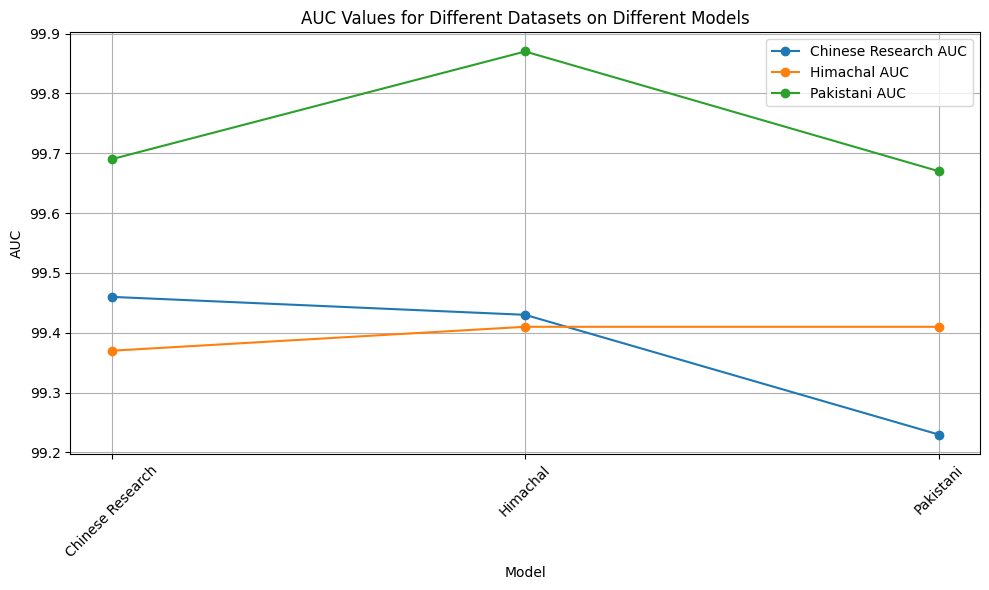

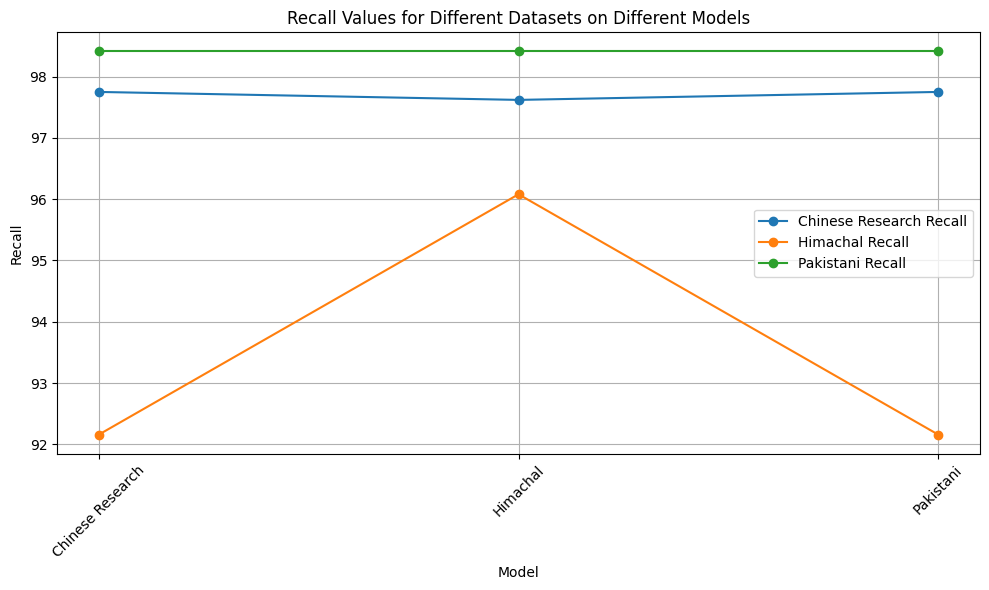

In [ ]:
datasets = ['Chinese Research', 'Himachal', 'Pakistani']
auc_values = [[99.46, 99.43, 99.23], [99.37, 99.41, 99.41], [99.69, 99.87, 99.67]]
recall_values = [[97.75, 97.62, 97.75], [92.16, 96.08, 92.16], [98.41, 98.41, 98.41]]

# Plot AUC values
plt.figure(figsize=(10, 6))
for i in range(len(datasets)):
    plt.plot(datasets, auc_values[i], marker='o', label=datasets[i] + ' AUC')

plt.title('AUC Values for Different Datasets on Different Models')
plt.xlabel('Model')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Recall values
plt.figure(figsize=(10, 6))
for i in range(len(datasets)):
    plt.plot(datasets, recall_values[i], marker='o', label=datasets[i] + ' Recall')

plt.title('Recall Values for Different Datasets on Different Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

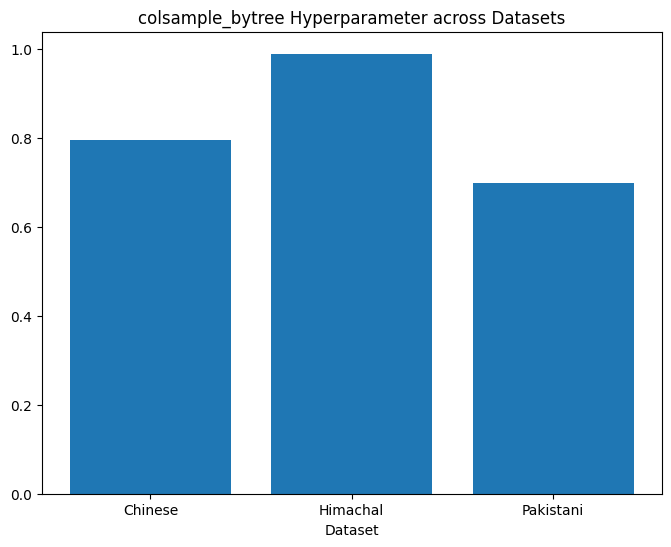

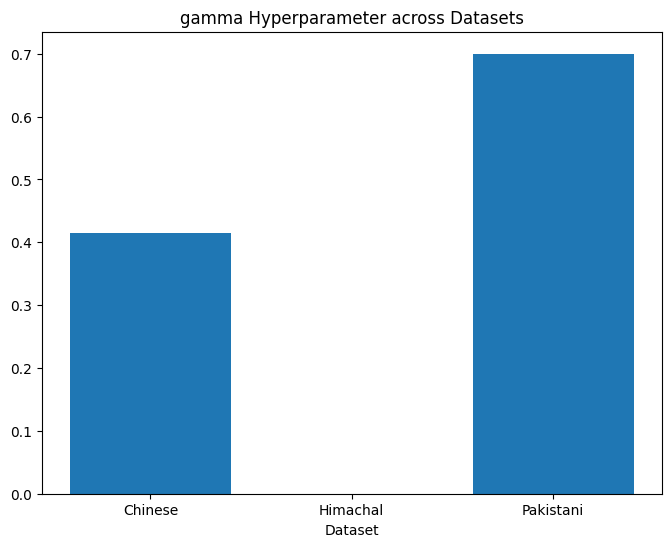

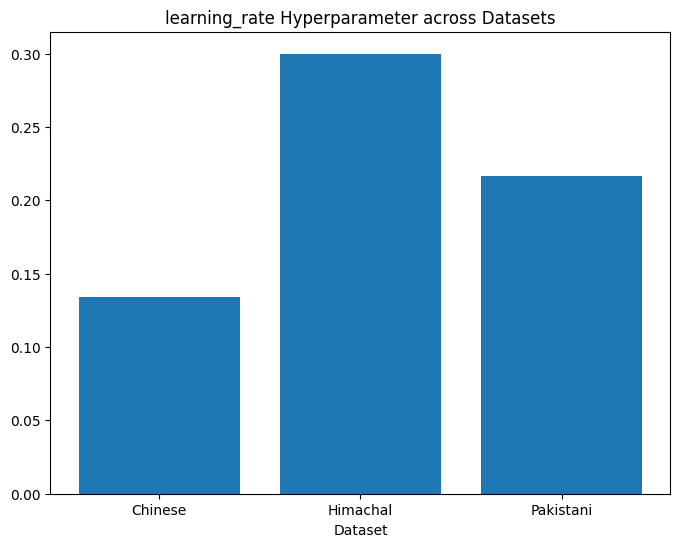

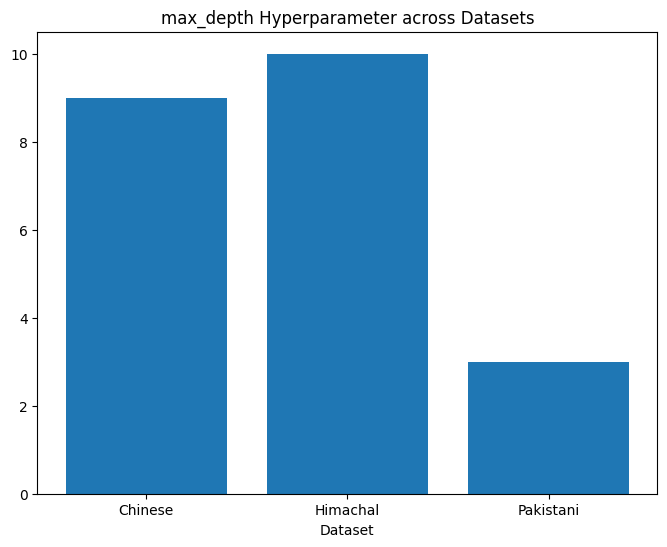

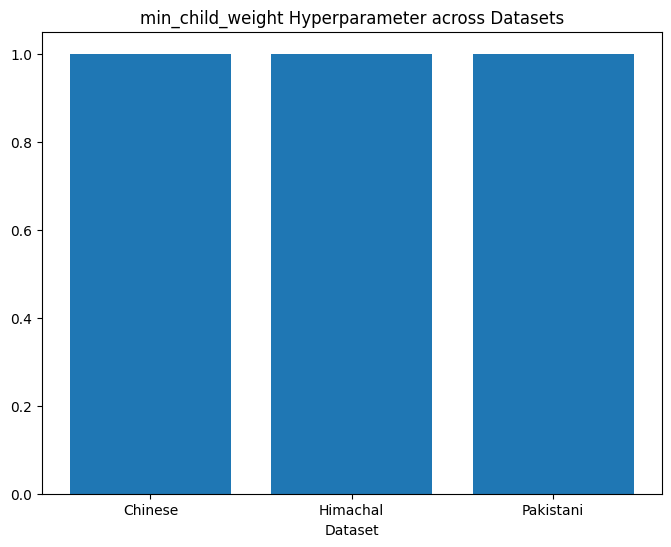

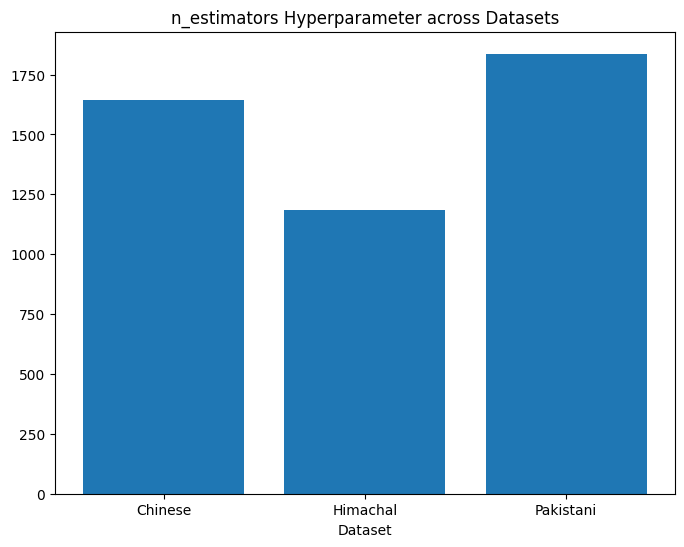

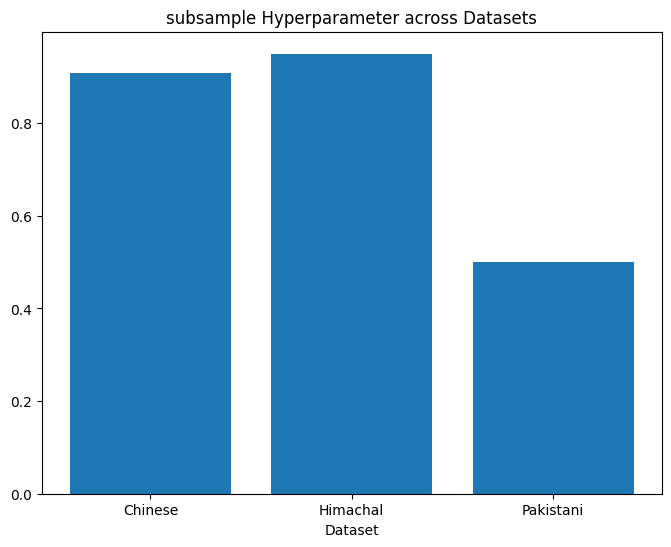

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the best hyperparameters for each dataset
best_params_chinese = {
    'colsample_bytree': 0.7959111975361703,
    'gamma': 0.4145319265659441,
    'learning_rate': 0.1340320476343796,
    'max_depth': 9,
    'min_child_weight': 1,
    'n_estimators': 1644,
    'subsample': 0.9089012338826619
}

best_params_himachal = {
    'colsample_bytree': 0.99,
    'gamma': 0.0,
    'learning_rate': 0.3,
    'max_depth': 10,
    'min_child_weight': 1,
    'n_estimators': 1185,
    'subsample': 0.95
}

best_params_pakistani = {
    'colsample_bytree': 0.7,
    'gamma': 0.7,
    'learning_rate': 0.21652603045194502,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 1837,
    'subsample': 0.5
}

# Create a DataFrame to store hyperparameters for each dataset
hyperparameters_df = pd.DataFrame([best_params_chinese, best_params_himachal, best_params_pakistani],
                                  index=['Chinese', 'Himachal', 'Pakistani'])

# Plot each hyperparameter as a separate bar plot
for col in hyperparameters_df.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(hyperparameters_df.index, hyperparameters_df[col])
    plt.title(f"{col} Hyperparameter across Datasets")
    plt.xlabel('Dataset')



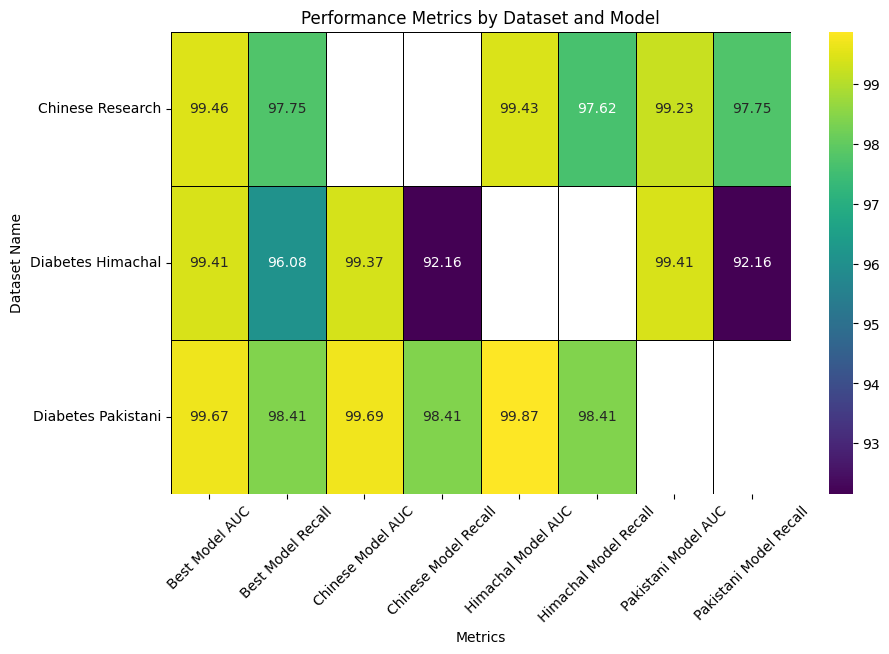

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {
    'Dataset Name': ['Chinese Research', 'Diabetes Himachal', 'Diabetes Pakistani'],
    'Best Model AUC': [99.46, 99.41, 99.67],
    'Best Model Recall': [97.75, 96.08, 98.41],
    'Chinese Model AUC': [None, 99.37, 99.69],
    'Chinese Model Recall': [None, 92.16, 98.41],
    'Himachal Model AUC': [99.43, None, 99.87],
    'Himachal Model Recall': [97.62, None , 98.41],
    'Pakistani Model AUC': [99.23, 99.41, None],
    'Pakistani Model Recall': [97.75, 92.16, None]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set 'Dataset Name' as index
df.set_index('Dataset Name', inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Performance Metrics by Dataset and Model')
plt.xlabel('Metrics')
plt.ylabel('Dataset Name')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
